In [69]:
import numpy as np
from newsapi import NewsApiClient
import matplotlib.pyplot as plt
import json
import random
from datetime import date, timedelta, datetime
import seaborn
import time
import pandas

In [71]:
dji_data = pandas.read_csv('data/DJI.csv')

In [40]:
api_key = 'e9436ecde682495cb27258cf59eefcb0'

# Init
newsapi = NewsApiClient(api_key=api_key)

In [33]:
def get_article(query, source, date):
    api_response = newsapi.get_everything(q=query,
                                      sources=source,
                                      from_param=date,
                                      to=date,
                                      language='en',
                                      sort_by='relevancy',
                                      page=1)
    articles = api_response['articles']
    num_articles = len(articles) > 0
    assert num_articles > 0
    return articles[random.randint(0, num_articles)]

In [53]:
get_article('economy', 'reuters', '2020-04-10')

{'source': {'id': 'reuters', 'name': 'Reuters'},
 'author': 'Jonnelle Marte',
 'title': 'Fed policymakers working to limit damage as pandemic puts U.S. economy on pause',
 'description': 'The U.S. economy was on a strong footing before the coronavirus pandemic and Federal Reserve officials are working to help the economy rebound quickly once businesses that were shuttered because of the virus begin to reopen, two policymakers said Friday.',
 'url': 'https://www.reuters.com/article/us-health-coronavirus-usa-fed-idUSKCN21S21G',
 'urlToImage': 'https://s3.reutersmedia.net/resources/r/?m=02&d=20200410&t=2&i=1514711056&w=1200&r=LYNXNPEG391B6',
 'publishedAt': '2020-04-10T19:58:05Z',
 'content': '(Reuters) - The U.S. economy was on a strong footing before the coronavirus pandemic and Federal Reserve officials are working to help the economy rebound quickly once businesses that were shuttered because of the virus begin to reopen, two policymakers said … [+2867 chars]'}

In [36]:
def get_sentiment_prediction(sentence):
    return random.randint(0, 1)

In [192]:
def create_graph(query, source, from_date, to_date):
    current_date = datetime.strptime(from_date, '%Y-%m-%d').date()
    end_date = datetime.strptime(to_date, '%Y-%m-%d').date()
    dates = []
    sentiment = []
    dji_values = []
    
    while current_date <= end_date:
        close_value = dji_data.loc[dji_data['Date'] == str(current_date)]['Close']
        
        if len(close_value) > 0:
            dji_values.append(float(close_value))
        else:
            dji_values.append(dji_values[-1])
        
        #article = get_article(query, source, str(current_date))
        dates.append(current_date)
        sentiment.append(get_sentiment_prediction('fake_news'))
        current_date += timedelta(1)
        
    plt.plot(dates, dji_values)
    plt.gcf().autofmt_xdate()
    
    for i in range(len(sentiment)):
        if sentiment[i] == 1:
             plt.axvline(pandas.Timestamp(str(dates[i])), color='g', linewidth=9, alpha=0.1)
        else:
             plt.axvline(pandas.Timestamp(str(dates[i])), color='r', linewidth=9, alpha=0.1)
    
    plt.show()

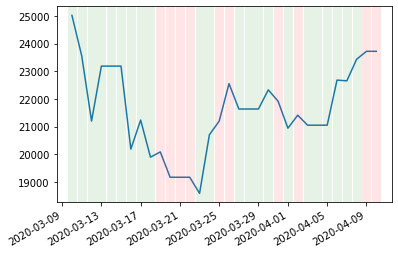

In [193]:
create_graph('economy', 'reuters', '2020-03-10', '2020-04-10')